# STAT207 Mini-Project #2 - Case Study: Predicting Salaries Based on Job and Market


NAME: Vivian Lin

NETID: vivianl5

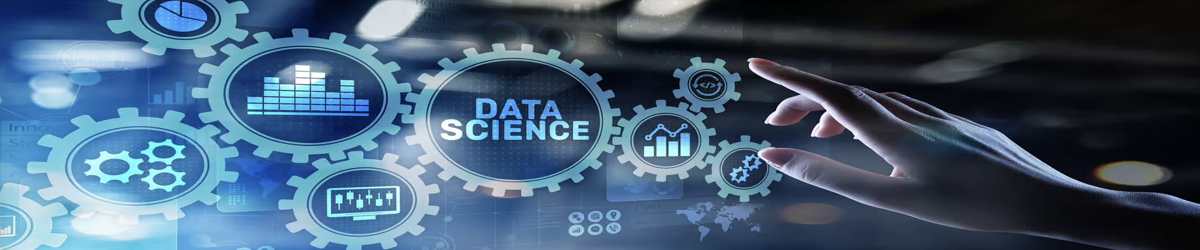

In [430]:
# Just to make my mini project more attracting and not that boring, I decided to put a picture here.
from PIL import Image
image = Image.open('ds.png')
# Adjust the picture ration.
new_width = 1200
new_height = 250
resized_image = image.resize((new_width, new_height))

# Diaplay the picture.
display(resized_image)

In [431]:
# Imports here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## 1. Introduction

As a student who is currently persuing an Information Sciences major with a minor in Data Science,  I anticipate working in the tech industry in the future. Understanding job compensation trends is an important factor when making career decisions, as it allows job seekers to make informed choices about potential opportunities. 

This project aims to build a predictive model that effectively estimates salary based on key explanatory variables. In addition to helping individuals navigate job markets, this analysis also provides me hands-on experience in constructing a machine learning model beyond standard lab assignments.

### Primary Research Goal of Analysis: Prediction
The primary research goal of this project is to build linear regression models that can accurately model the relationship between `Salary` and the following explanatory variables.

* `Age`
* `Gender`
* `Education Level`
* `Job Title`
* `Years of Experience`

### Secondary Research Goal of Analysis: Interpretation
Beyond prediction, this project also seeks to identify what the key variables are in the relaship. For instance, which factor is the most predictive indicator for predicting ones `Salary`.

## 2. Dataset Discussion

The dataset used in this study comes from Kaggle(https://www.kaggle.com/datasets/mohithsairamreddy/salary-data). It consists of 6,704 rows collected from various sources, including surveys, job posting sites, and other publicly available platforms. 

The dataset includes the following attributes:

1. Age: Age of the individual.
2. Gender: Gender of the individual.
3. Education Level: Highest level of education attained.
4. Job Title: Title of the individual's job.
5. Years of Experience: Number of years the individual has worked.
6. Salary: Annual salary of the individual.

## 3. Dataset Cleaning
### 3.1 Dataset 

1. Read the csv file into a dataframe and convert all implicit missing values in the columns that I intend to use to "NaN".
2. Show the number of rows and columns in the dataframe.

In [432]:
# Load the dataframe and deal with the missing values.
df = pd.read_csv("Salary_Data.csv", na_values=[""])

# Test code.
# df.head(5)

### 3.2 Dataset Cleaning
#### 3.2.1 Dropping NaN Values

In [433]:
# Show the numbers of rows and columns in the dataframe.
df.shape

(6704, 6)

In [434]:
# To see what kinds of information contain in the dataframe.
df.isna().sum()

# Another way to do so.
#df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [435]:
# Check out what values are stored in the corresponding columns.
# df[df["Age"].isna()] # Row 172 and 260 have "NaN" values.
# df[df["Gender"].isna()] # Row 172 and 260 have "NaN" values.
# df[df["Job Title"].isna()] # Row 172 and 260 have "NaN" values.
# df[df["Education Level"].isna()] # Row 172, 260, and 2011 have "NaN" values.
# df[df["Years of Experience"].isna()] # Row 172, 260, and 5247 have "NaN" values.
# df[df["Salary"].isna()] # Row 172, 260, 3136, 5247, and 6455 have "NaN" values.

In [436]:
# Drop NaN values.
df = df.dropna()

# Test code.
# df_clean.head(5)

#### 3.2.2 Renaming "Education Level" Values

In [437]:
# Check what information is in the "Eduaction Level" column.
# df["Education Level"].value_counts()

In [438]:
# Renaming.
# "PhD" and "phD" -> PhD
df.loc[df['Education Level'] == "phD", "Education Level"] = "PhD"

# "Master's Degree" and "Master's" -> MS
df.loc[df["Education Level"] == "Master's", "Education Level"] = "MS"
df.loc[df["Education Level"] == "Master's Degree", 'Education Level'] = "MS"

# "Bachelor's Degree" and "Bachelor's" -> BS
df.loc[df["Education Level"] == "Bachelor's", "Education Level"] = "BS"
df.loc[df["Education Level"] == "Bachelor's Degree", "Education Level"] = "BS"

# Re-check if I renamed correctly or not.
# df["Education Level"].value_counts()

# Test code.
# df.head(5)

#### 3.2.3 Job Title Grouping

When investigaing how many kinds of jobs are there in this dataframe, I found out there are 191 kinds of jobs in it. However, lots of the jobs don't appear that many times. Therefore, I only focus on the jobs that appear more than 100 times.

In [439]:
# Check the frequency that each job appears in the dataframe.
job_counts = df["Job Title"].value_counts()

# Test code.
# job_counts

In [440]:
# Create the job list.
job_lst = list(df["Job Title"].value_counts()[:18].index)

# Test code.
# job_lst

In [441]:
# Overwrite the dataframe.
df = df[df["Job Title"].isin(job_lst)]

# Test code.
# df.shape[0]

## 4. Preliminary Analysis
### 4.1 Numerical Variable Relationships

For each pair of numerical variables [`Salary`, `Age`, `Years of Experience`], I would like to plot scatterplots for them and find out which numerical explanatory variable displays the strongest *linear* relationship with the `Salary` response variable.

Variable "Years of Experience" has the strongest linear relationship(0.7665 correlation) with response variable.

In [442]:
# # Create pairplot.
# NUM_VAR1 = ["Salary", "Age", "Years of Experience"]
# sns.pairplot(df[NUM_VAR1])

Text(0.5, 0, 'Years of Experience')

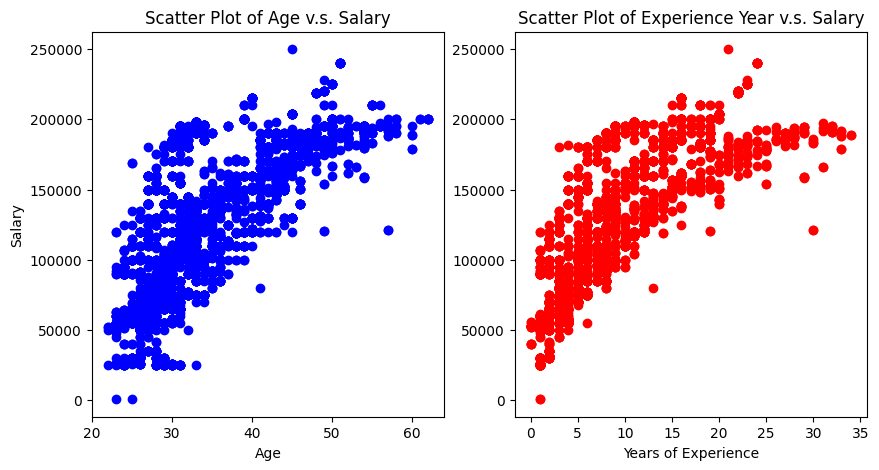

In [443]:
# Another way to do so.
# Method learned from IS 445.
NUM_VAR1 = ["Salary", "Age", "Years of Experience"]
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot: 
axes[0].scatter(df[NUM_VAR1[1]], df[NUM_VAR1[0]], color="blue")
axes[0].set_title("Scatter Plot of Age v.s. Salary")
axes[0].set_xlabel(NUM_VAR1[1])
axes[0].set_ylabel(NUM_VAR1[0])

# Plot: 
axes[1].scatter(df[NUM_VAR1[2]], df[NUM_VAR1[0]], color="red")
axes[1].set_title("Scatter Plot of Experience Year v.s. Salary")
axes[1].set_xlabel(NUM_VAR1[2])


In [444]:
# Calculate the correlation.
correlation = round(df[NUM_VAR1].corr(), 4)
correlation

,Salary,Age,Years of Experience
Salary,1.0000,0.7097,0.7665
Age,0.7097,1.0000,0.9365
Years of Experience,0.7665,0.9365,1.0000


### 4.2 Categorical Variable Relationships with Salary

Is there an association between the categorical variables(`Gender`, `Education Level`, and `Job Title`) and the `Salary` variable in this dataset?

Variables "Education Level" and "Job Title" have the most spearated boxplots, meaning that using these variables with different levels can be good indicators of the salary.

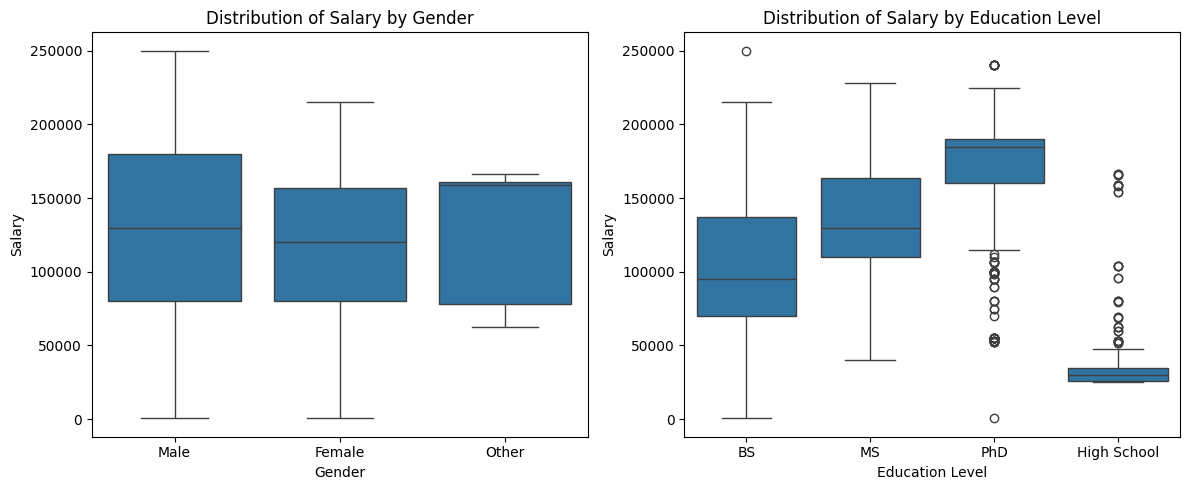

In [445]:
CAT_VAR1 = ["Gender", "Education Level", "Job Title"]

# Method learned from IS445.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the boxplot for "Gender" variable.
sns.boxplot(x=CAT_VAR1[0], y="Salary", data=df, ax=axes[0])
axes[0].set_title("Distribution of Salary by Gender")

# Plot the boxplot for "Gender" variable.
sns.boxplot(x=CAT_VAR1[1], y="Salary", data=df, ax=axes[1])
axes[1].set_title("Distribution of Salary by Education Level")

# Adjust the layout.
plt.tight_layout()

In [446]:
# # Plot the boxplot for "Gender" variable.
# CAT_VAR1 = ["Gender", "Education Level", "Job Title"]
# sns.boxplot(x=CAT_VAR1[0], y="Salary", data=df)

# # Plot the labels properly.
# plt.title("Distribution of Salary by Gender")
# plt.show()

In [447]:
# # Plot the boxplot for "Education Level" variable.
# sns.boxplot(x=CAT_VAR1[1], y="Salary", data=df)

# # Plot the labels properly.
# plt.title("Distribution of Salary by Education Level")

# # Plot the plot properly.
# plt.show()

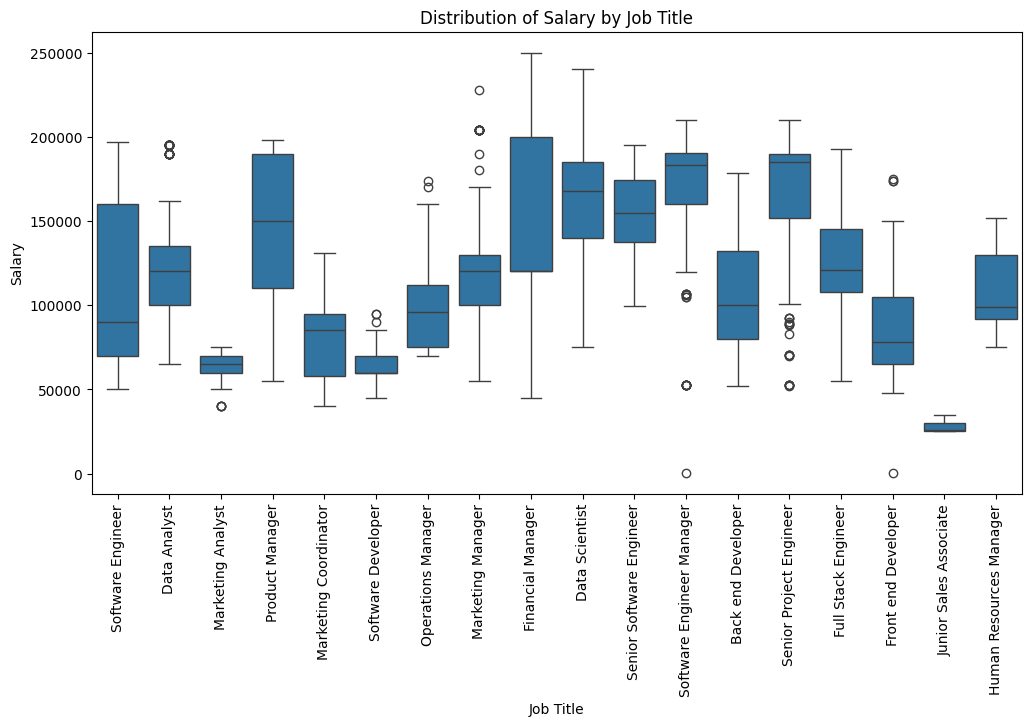

In [448]:
# Plot the boxplot for "Job Title" variable.
plt.figure(figsize=(12, 6))
sns.boxplot(x=CAT_VAR1[2], y="Salary", data=df)

# Plot the labels properly.
plt.title("Distribution of Salary by Job Title")
plt.xticks(rotation=90)
plt.show()

### 4.3 Finding Interactions between Categorical and Numerical Explanatory Variable Pairs

For every categorical explanatory variable and numerical explanatory variable pair in the dataframw, evaluate if there is an interaction between these two terms in how they impact the predicted "Salary" response variable. Which one of these categorical explanatory variable and numerical explanatory variable pairs has the weakest interaction?

By observing the following interaction plots, I think variable "Age" and variable "Gender" has the weakest interaction since the slopes are the least different from each other.

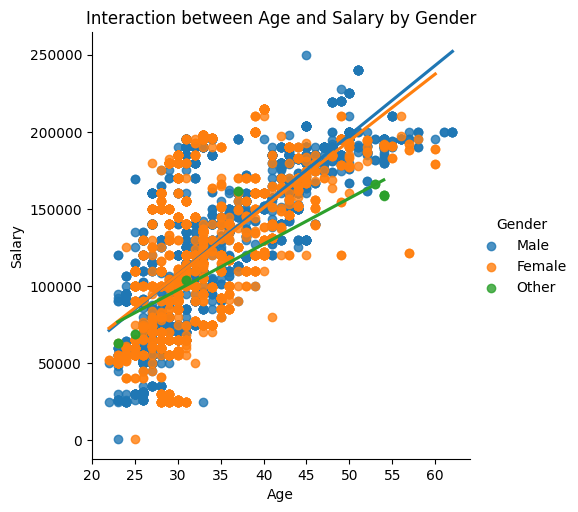

In [449]:
sns.lmplot(x="Age", y="Salary", hue="Gender", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Age and Salary by Gender")
plt.show()

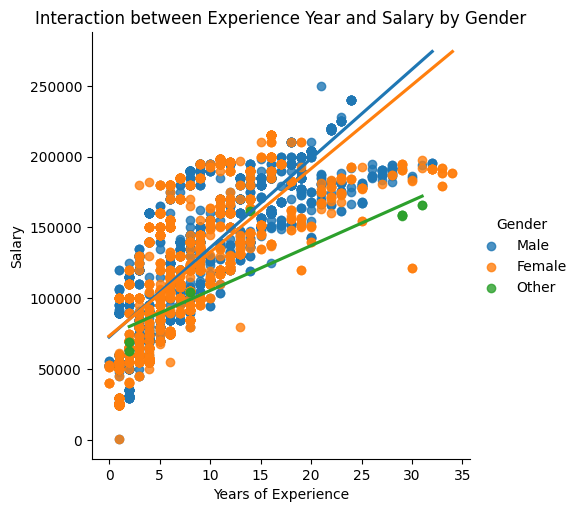

In [450]:
sns.lmplot(x="Years of Experience", y="Salary", hue="Gender", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Experience Year and Salary by Gender")
plt.show()

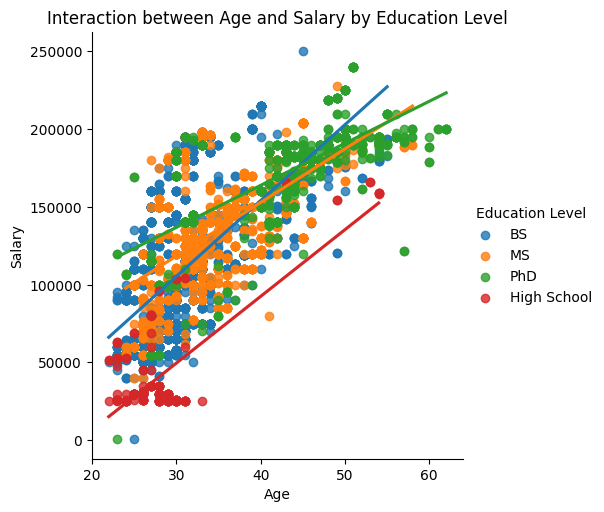

In [451]:
sns.lmplot(x="Age", y="Salary", hue="Education Level", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Age and Salary by Education Level")
plt.show()

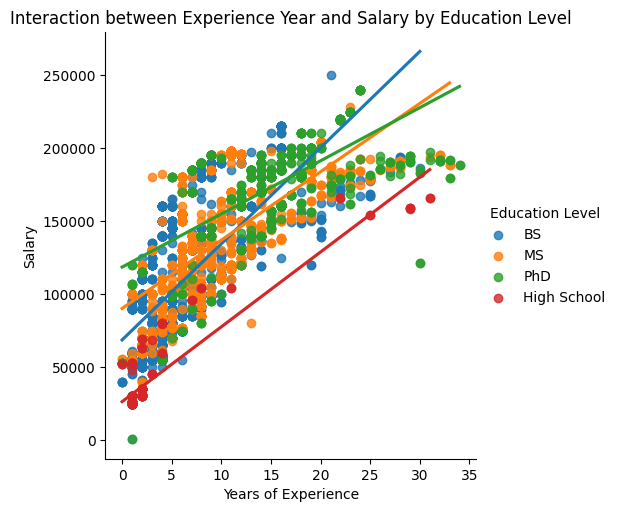

In [452]:
sns.lmplot(x="Years of Experience", y="Salary", hue="Education Level", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Experience Year and Salary by Education Level")
plt.show()

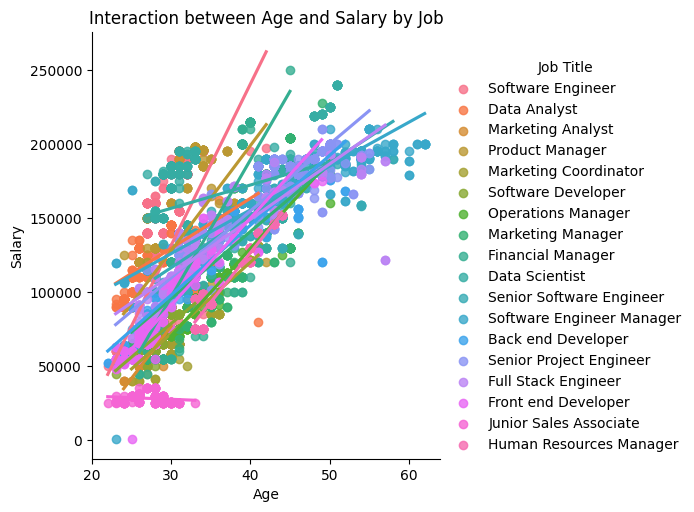

In [453]:
sns.lmplot(x="Age", y="Salary", hue="Job Title", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Age and Salary by Job")
plt.show()

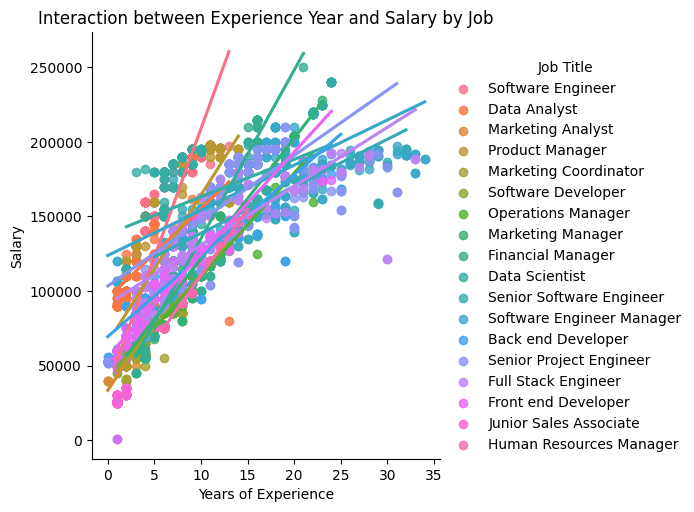

In [454]:
sns.lmplot(x="Years of Experience", y="Salary", hue="Job Title", ci=False, data=df)

# Plot the label properly.
plt.title("Interaction between Experience Year and Salary by Job")
plt.show()

## 5. Predictive Models
### 5.1 Training and Test Datasets

I intend to build linear regression models that will predict the `Salary` using the following explanatory variables.

* `Age`
* `Gender`
* `Education Level`
* `Job Title`
* `Years of Experience`

Using some combination of these explanatory variables, I'd like to build and select a linear regression model which I can infer might perform well when it comes to predicting the Salary. Thus, I create a training and a test dataset from the cleaned dataframe from 3.2.3.

Noted that I use a random state of 207 to do this and the training dataset is 80% of observations from the cleaned dataframe.

In [478]:
# Rename the columns.
df = df.rename(columns={"Education Level": "Education_Level", "Job Title": "Job", "Years of Experience": "Experience_Year"})

# Test code.
# df.head(5)

In [456]:
# Split the dataset.
df_train, df_test = train_test_split(df, test_size=0.2, random_state=207)

# Test code.
# df_train.head(5)

### 5.2 Scaling Training and Testing Dataset

Since I'd like to be able to compare the magnitudes of the slopes in the linear regression models to try to infer the corresponding explanatory variable's importance when it comes to predicting `Salary`, I need to z-score scale my training dataframe and testing dataframe.

In [457]:
NUM_VAR2 = ["Age", "Experience_Year"]

# Scale the numerical variable in the df_train.
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(df_train[NUM_VAR2])
df_train[NUM_VAR2] = scaled_expl_vars

# Check the std.
# df_train[NUM_VAR2].std()

# Test code.
# df_train.head(5)

In [458]:
# Scale the numerical variable in the df_test.
scaler_test = StandardScaler()
scaled_expl_vars = scaler_test.fit_transform(df_test[NUM_VAR2])
df_test[NUM_VAR2] = scaled_expl_vars

# Check the std.
# df_test[NUM_VAR2].std()

# Test code.
# df_test.head(5)

### 5.3 Full Model

#### 5.3.1 Fitting the Full Model

Fit the Full model that predicts `salary` with

* `Age`
* `Gender`
* `Education Level`
* `Job Title`
* `Years of Experience`

Show the test $R^2$ for this model.

In [459]:
# Fit the model.
full_model = smf.ols(formula="Salary~Age+Gender+Education_Level+Job+Experience_Year", data=df_train).fit()

# Output the result.
# print(full_model.summary())

# Response variable.
y_test = df_test["Salary"]

# Training predicted response variable.
y_pred_test_fm = full_model.predict(df_test)

# Calculation test R^2.
round(r2_score(y_test, y_pred_test_fm), 4)

0.7679

#### 5.3.2 Linearity Assumption

By examing the Fitted Values v.s. Residuals Plot, I would say the model mostly meets the linearity assumption when its fitted values are between 50000 to 200000; however, if we also check the values that are not lie in that interval, then I would say the model does not meet the linearity assumption that well. Furthermore, there may be a possible way that we can transfor this model to make it better meet the linearity assumption. 

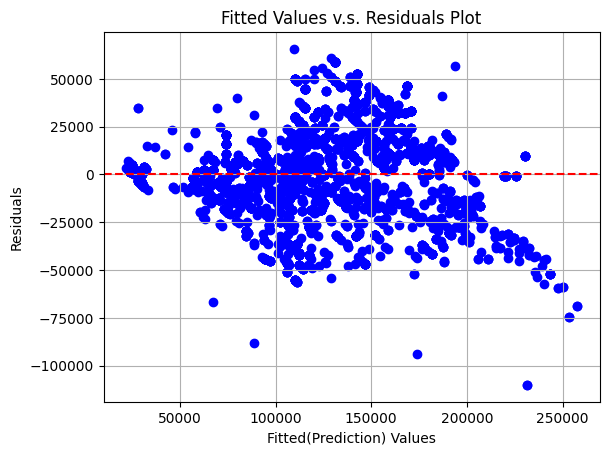

In [460]:
# Assessing linearity of the full model.
plt.scatter(full_model.fittedvalues, full_model.resid, color="blue")
plt.axhline(y=0, color="red", linestyle="--")

# Plot the box properly.
plt.xlabel("Fitted(Prediction) Values")
plt.ylabel("Residuals")
plt.title("Fitted Values v.s. Residuals Plot")
plt.grid(True)
plt.show()

### 5.4 Full Model with Transformation

#### 5.4.1 Fitting the Full Model with transformation

Fit the Full model that predicts `salary` with

* `sqrt_root_age`
* `Gender`
* `Education Level`
* `Job Title`
* `sqrt_root_experience_year`

Check if the transformed full model meet the linearity assumption.

After transformation, we can find out that the model doesn't improve the linearity assumption.

In [461]:
# Transformation
df["sqrt_root_age"] = np.sqrt(df["Age"])
df["sqrt_root_exper"] = np.sqrt(df["Experience_Year"])

# Test code.
# df.head(5)

In [462]:
# Split the dataset.
df_train1, df_test1 = train_test_split(df, test_size=0.2, random_state=207)

# Test code.
# df_train1.head(5)

In [463]:
NUM_VAR3 = ["sqrt_root_age", "sqrt_root_exper"]

# Scale the numerical variable in the df_train.
scaler_training1 = StandardScaler()
scaled_expl_vars1 = scaler_training1.fit_transform(df_train1[NUM_VAR3])
df_train1[NUM_VAR3] = scaled_expl_vars1

# Scale the numerical variable in the df_test.
scaler_test1 = StandardScaler()
scaled_expl_vars1 = scaler_test1.fit_transform(df_test1[NUM_VAR3])
df_test1[NUM_VAR3] = scaled_expl_vars1

# Check the std.
# df_train1[NUM_VAR3].std()
# df_test1[NUM_VAR3].std()

# Test code.
# df_train1.head(5)
# df_test1.head(5)

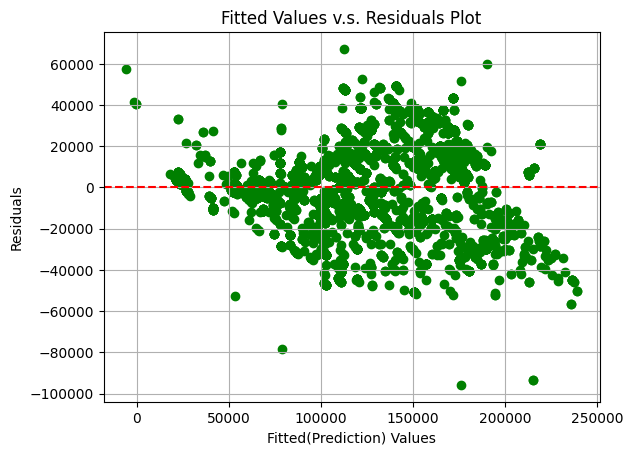

In [464]:
# Fit the model.
tr_model = smf.ols(formula="Salary~sqrt_root_age+Gender+Education_Level+Job+sqrt_root_exper", data=df_train1).fit()

# Assessing linearity of the transformed full model.
plt.scatter(tr_model.fittedvalues, tr_model.resid, color="green")
plt.axhline(y=0, color="red", linestyle="--")

# Plot the box properly.
plt.xlabel("Fitted(Prediction) Values")
plt.ylabel("Residuals")
plt.title("Fitted Values v.s. Residuals Plot")
plt.grid(True)
plt.show()

### 5.5 Full Model with Interaction Terms

#### 5.5.1 Incorporating the Interaction Terms and Calculate the Test $R^2$

Delete the categorical explanatory variable and numerical explanatory variable pairs that I found out that display the weakest interaction between how they impact the Salary response variable, and then incorporate the interaction terms that model this interaction effect of the rest chosen categorical explanatory variable and numerical explanatory variable pairs into the full model.

The pair I deleted here is based on what I found in 4.3.

In [465]:
# Fit the new model.
it_model = smf.ols(formula="Salary~Age+Gender+Education_Level+Job+Experience_Year+Experience_Year*Gender+Age*Education_Level+Experience_Year*Education_Level+Age*Job+Experience_Year*Job", data=df_train).fit()

# Output the result.
# print(it_model.summary())

# Response variable.
y_test = df_test["Salary"]

# Training predicted response variable.
y_pred_test_it = it_model.predict(df_test)

# Calculate test R^2.
round(r2_score(y_test, y_pred_test_it), 4)

0.8927

#### 5.5.2 Linearity Assumption

By examing the Fitted Values v.s. Residuals Plot, I would say the model mostly meets the linearity assumption when its fitted values are between 50000 to 200000; however, if we also check the values that are not lie in that interval, then I would say the model does not meet the linearity assumption that well. Hence, there may be a possible way that we can transfor this model to make it perfectly meet the linearity assumption. 

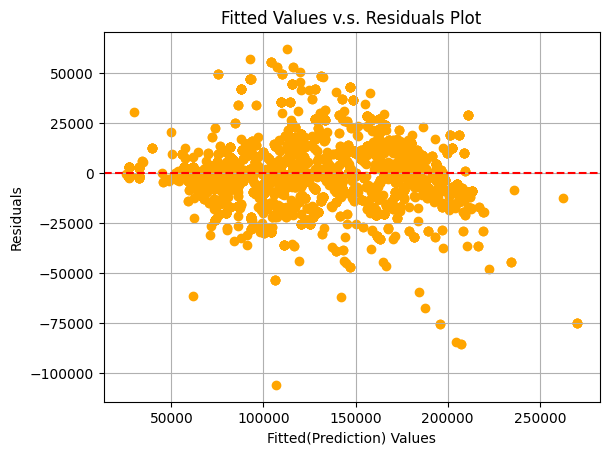

In [466]:
# Assessing linearity of the full model with interaction terms.
plt.scatter(it_model.fittedvalues, it_model.resid, color="orange")
plt.axhline(y=0, color="red", linestyle="--")

# Plot the box properly.
plt.xlabel("Fitted(Prediction) Values")
plt.ylabel("Residuals")
plt.title("Fitted Values v.s. Residuals Plot")
plt.grid(True)
plt.show()

### 5.6 Backwards Elimination

Using backwards elimination as a way of performing feature selection.

In [467]:
# Fit the model.
full_model = smf.ols(formula="Salary~Age+Gender+Education_Level+Job+Experience_Year", data=df_train).fit()
be_model1 = smf.ols(formula="Salary~Gender+Education_Level+Job+Experience_Year", data=df_train).fit()
be_model2 = smf.ols(formula="Salary~Age+Education_Level+Job+Experience_Year", data=df_train).fit()
be_model3 = smf.ols(formula="Salary~Age+Gender+Job+Experience_Year", data=df_train).fit()
be_model4 = smf.ols(formula="Salary~Age+Gender+Education_Level+Experience_Year", data=df_train).fit()
be_model5 = smf.ols(formula="Salary~Age+Gender+Education_Level+Job", data=df_train).fit()

# Predict the Salary.
y_pred_test = full_model.predict(df_test)
y_pred_test1 = be_model1.predict(df_test)
y_pred_test2 = be_model2.predict(df_test)
y_pred_test3 = be_model3.predict(df_test)
y_pred_test4 = be_model4.predict(df_test)
y_pred_test5 = be_model5.predict(df_test)

# Output the result.
print(f"Full Model Traning R^2: {full_model.rsquared:.4f}")
print(f"Full Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Age + Gender + Education_Level + Job + Experience_Year")
print("------------------------------------------------------------------------")
print(f"Model1 Traning R^2: {be_model1.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test1), 5)}")
print("------------------------------------------------------------------------")
print(f"Model2 Traning R^2: {be_model2.rsquared:.4f}")
print(f"Model2 Test R^2: {round(r2_score(y_test, y_pred_test2), 5)}")
print("------------------------------------------------------------------------")
print(f"Model3 Traning R^2: {be_model3.rsquared:.4f}")
print(f"Model3 Test R^2: {round(r2_score(y_test, y_pred_test3), 5)}")
print("------------------------------------------------------------------------")
print(f"Model4 Traning R^2: {be_model4.rsquared:.4f}")
print(f"Model4 Test R^2: {round(r2_score(y_test, y_pred_test4), 5)}")
print("------------------------------------------------------------------------")
print(f"Model5 Traning R^2: {be_model5.rsquared:.4f}")
print(f"Model5 Test R^2: {round(r2_score(y_test, y_pred_test5), 5)}")

Full Model Traning R^2: 0.7539
Full Model Test R^2: 0.76793
Formula: Salary ~ Age + Gender + Education_Level + Job + Experience_Year
------------------------------------------------------------------------
Model1 Traning R^2: 0.7516
Model1 Test R^2: 0.76702
------------------------------------------------------------------------
Model2 Traning R^2: 0.7538
Model2 Test R^2: 0.768
------------------------------------------------------------------------
Model3 Traning R^2: 0.7497
Model3 Test R^2: 0.76399
------------------------------------------------------------------------
Model4 Traning R^2: 0.6459
Model4 Test R^2: 0.67058
------------------------------------------------------------------------
Model5 Traning R^2: 0.7293
Model5 Test R^2: 0.73984


In [468]:
# Fit the model.
curr_be_model = smf.ols(formula="Salary~Age+Education_Level+Job+Experience_Year", data=df_train).fit()
be_model6 = smf.ols(formula="Salary~Education_Level+Job+Experience_Year", data=df_train).fit()
be_model7 = smf.ols(formula="Salary~Age+Job+Experience_Year", data=df_train).fit()
be_model8 = smf.ols(formula="Salary~Age+Education_Level+Experience_Year", data=df_train).fit()
be_model9 = smf.ols(formula="Salary~Age+Education_Level+Job", data=df_train).fit()

# Predict the Salary.
y_pred_test = curr_be_model.predict(df_test)
y_pred_test6 = be_model6.predict(df_test)
y_pred_test7 = be_model7.predict(df_test)
y_pred_test8 = be_model8.predict(df_test)
y_pred_test9 = be_model9.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_be_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Age + Education_Level + Job + Experience_Year")
print("---------------------------------------------------------------")
print(f"Model6 Traning R^2: {be_model6.rsquared:.4f}")
print(f"Model6 Test R^2: {round(r2_score(y_test, y_pred_test6), 5)}")
print("---------------------------------------------------------------")
print(f"Model7 Traning R^2: {be_model7.rsquared:.4f}")
print(f"Model7 Test R^2: {round(r2_score(y_test, y_pred_test7), 5)}")
print("---------------------------------------------------------------")
print(f"Model8 Traning R^2: {be_model8.rsquared:.4f}")
print(f"Model8 Test R^2: {round(r2_score(y_test, y_pred_test8), 5)}")
print("---------------------------------------------------------------")
print(f"Model9 Traning R^2: {be_model9.rsquared:.4f}")
print(f"Model9 Test R^2: {round(r2_score(y_test, y_pred_test9), 5)}")


Current Model Traning R^2: 0.7538
Current Model Test R^2: 0.768
Formula: Salary ~ Age + Education_Level + Job + Experience_Year
---------------------------------------------------------------
Model6 Traning R^2: 0.7515
Model6 Test R^2: 0.76746
---------------------------------------------------------------
Model7 Traning R^2: 0.7478
Model7 Test R^2: 0.76378
---------------------------------------------------------------
Model8 Traning R^2: 0.6435
Model8 Test R^2: 0.67263
---------------------------------------------------------------
Model9 Traning R^2: 0.7291
Model9 Test R^2: 0.73911


### 5.7 Forward Selection

Using Forward Selection as a way of performing feature selection.

In [469]:
# Fit the model.
curr_fs_model = smf.ols(formula="Salary~1", data=df_train).fit()
fs_model1 = smf.ols(formula="Salary~Age", data=df_train).fit()
fs_model2 = smf.ols(formula="Salary~Gender", data=df_train).fit()
fs_model3 = smf.ols(formula="Salary~Education_Level", data=df_train).fit()
fs_model4 = smf.ols(formula="Salary~Job", data=df_train).fit()
fs_model5 = smf.ols(formula="Salary~Experience_Year", data=df_train).fit()

# Predict the Salary.
y_pred_test = curr_fs_model.predict(df_test)
y_pred_test1 = fs_model1.predict(df_test)
y_pred_test2 = fs_model2.predict(df_test)
y_pred_test3 = fs_model3.predict(df_test)
y_pred_test4 = fs_model4.predict(df_test)
y_pred_test5 = fs_model5.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_fs_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ 1")
print("------------------------------")
print(f"Model1 Traning R^2: {fs_model1.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test1), 5)}")
print("------------------------------")
print(f"Model2 Traning R^2: {fs_model2.rsquared:.4f}")
print(f"Model2 Test R^2: {round(r2_score(y_test, y_pred_test2), 5)}")
print("------------------------------")
print(f"Model3 Traning R^2: {fs_model3.rsquared:.4f}")
print(f"Model3 Test R^2: {round(r2_score(y_test, y_pred_test3), 5)}")
print("------------------------------")
print(f"Model4 Traning R^2: {fs_model4.rsquared:.4f}")
print(f"Model4 Test R^2: {round(r2_score(y_test, y_pred_test4), 5)}")
print("------------------------------")
print(f"Model5 Traning R^2: {fs_model5.rsquared:.4f}")
print(f"Model5 Test R^2: {round(r2_score(y_test, y_pred_test5), 5)}")

Current Model Traning R^2: -0.0000
Current Model Test R^2: -0.00044
Formula: Salary ~ 1
------------------------------
Model1 Traning R^2: 0.5037
Model1 Test R^2: 0.5027
------------------------------
Model2 Traning R^2: 0.0113
Model2 Test R^2: 0.00768
------------------------------
Model3 Traning R^2: 0.3574
Model3 Test R^2: 0.37141
------------------------------
Model4 Traning R^2: 0.5252
Model4 Test R^2: 0.51877
------------------------------
Model5 Traning R^2: 0.5843
Model5 Test R^2: 0.59885


In [470]:
# Fit the model.
curr_fs_model = smf.ols(formula="Salary~Experience_Year", data=df_train).fit()
fs_model6 = smf.ols(formula="Salary~Experience_Year+Age", data=df_train).fit()
fs_model7 = smf.ols(formula="Salary~Experience_Year+Gender", data=df_train).fit()
fs_model8 = smf.ols(formula="Salary~Experience_Year+Education_Level", data=df_train).fit()
fs_model9 = smf.ols(formula="Salary~Experience_Year+Job", data=df_train).fit()

# Predict the Salary.
y_pred_test = curr_fs_model.predict(df_test)
y_pred_test6 = fs_model6.predict(df_test)
y_pred_test7 = fs_model7.predict(df_test)
y_pred_test8 = fs_model8.predict(df_test)
y_pred_test9 = fs_model9.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_fs_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Experience_Year")
print("---------------------------------")
print(f"Model1 Traning R^2: {fs_model6.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test6), 5)}")
print("---------------------------------")
print(f"Model2 Traning R^2: {fs_model7.rsquared:.4f}")
print(f"Model2 Test R^2: {round(r2_score(y_test, y_pred_test7), 5)}")
print("---------------------------------")
print(f"Model3 Traning R^2: {fs_model8.rsquared:.4f}")
print(f"Model3 Test R^2: {round(r2_score(y_test, y_pred_test8), 5)}")
print("---------------------------------")
print(f"Model4 Traning R^2: {fs_model9.rsquared:.4f}")
print(f"Model4 Test R^2: {round(r2_score(y_test, y_pred_test9), 5)}")

Current Model Traning R^2: 0.5843
Current Model Test R^2: 0.59885
Formula: Salary ~ Experience_Year
---------------------------------
Model1 Traning R^2: 0.5846
Model1 Test R^2: 0.60023
---------------------------------
Model2 Traning R^2: 0.5892
Model2 Test R^2: 0.59703
---------------------------------
Model3 Traning R^2: 0.6413
Model3 Test R^2: 0.66829
---------------------------------
Model4 Traning R^2: 0.7445
Model4 Test R^2: 0.76283


In [471]:
# Fit the model.
curr_fs_model = smf.ols(formula="Salary~Experience_Year+Job", data=df_train).fit()
fs_model10 = smf.ols(formula="Salary~Experience_Year+Job+Age", data=df_train).fit()
fs_model11 = smf.ols(formula="Salary~Experience_Year+Job+Gender", data=df_train).fit()
fs_model12 = smf.ols(formula="Salary~Experience_Year+Job+Education_Level", data=df_train).fit()

# Predict the Salary.
y_pred_test = curr_fs_model.predict(df_test)
y_pred_test10 = fs_model10.predict(df_test)
y_pred_test11 = fs_model11.predict(df_test)
y_pred_test12 = fs_model12.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_fs_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Experience_Year + Job")
print("---------------------------------------")
print(f"Model1 Traning R^2: {fs_model10.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test10), 5)}")
print("---------------------------------------")
print(f"Model2 Traning R^2: {fs_model11.rsquared:.4f}")
print(f"Model2 Test R^2: {round(r2_score(y_test, y_pred_test11), 5)}")
print("---------------------------------------")
print(f"Model3 Traning R^2: {fs_model12.rsquared:.4f}")
print(f"Model3 Test R^2: {round(r2_score(y_test, y_pred_test12), 5)}")

Current Model Traning R^2: 0.7445
Current Model Test R^2: 0.76283
Formula: Salary ~ Experience_Year + Job
---------------------------------------
Model1 Traning R^2: 0.7478
Model1 Test R^2: 0.76378
---------------------------------------
Model2 Traning R^2: 0.7468
Model2 Test R^2: 0.76254
---------------------------------------
Model3 Traning R^2: 0.7515
Model3 Test R^2: 0.76746


In [472]:
# Fit the model.
curr_fs_model = smf.ols(formula="Salary~Experience_Year+Job+Education_Level", data=df_train).fit()
fs_model13 = smf.ols(formula="Salary~Experience_Year+Job+Education_Level+Age", data=df_train).fit()
fs_model14 = smf.ols(formula="Salary~Experience_Year+Job+Education_Level+Gender", data=df_train).fit()


# Predict the Salary.
y_pred_test = curr_fs_model.predict(df_test)
y_pred_test13 = fs_model13.predict(df_test)
y_pred_test14 = fs_model14.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_fs_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Experience_Year + Job + Education_Level")
print("---------------------------------------------------------")
print(f"Model1 Traning R^2: {fs_model13.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test13), 5)}")
print("---------------------------------------------------------")
print(f"Model2 Traning R^2: {fs_model14.rsquared:.4f}")
print(f"Model2 Test R^2: {round(r2_score(y_test, y_pred_test14), 5)}")

Current Model Traning R^2: 0.7515
Current Model Test R^2: 0.76746
Formula: Salary ~ Experience_Year + Job + Education_Level
---------------------------------------------------------
Model1 Traning R^2: 0.7538
Model1 Test R^2: 0.768
---------------------------------------------------------
Model2 Traning R^2: 0.7516
Model2 Test R^2: 0.76702


In [473]:
# Fit the model.
curr_fs_model = smf.ols(formula="Salary~Experience_Year+Job+Education_Level+Age", data=df_train).fit()
fs_model15 = smf.ols(formula="Salary~Experience_Year+Job+Education_Level+Age+Gender", data=df_train).fit()


# Predict the Salary.
y_pred_test = curr_fs_model.predict(df_test)
y_pred_test15 = fs_model13.predict(df_test)

# Output the result.
print(f"Current Model Traning R^2: {curr_fs_model.rsquared:.4f}")
print(f"Current Model Test R^2: {round(r2_score(y_test, y_pred_test), 5)}")
print("Formula: Salary ~ Experience_Year + Job + Education_Level + Age")
print("---------------------------------------------------------------")
print(f"Model1 Traning R^2: {fs_model15.rsquared:.4f}")
print(f"Model1 Test R^2: {round(r2_score(y_test, y_pred_test15), 5)}")

Current Model Traning R^2: 0.7538
Current Model Test R^2: 0.768
Formula: Salary ~ Experience_Year + Job + Education_Level + Age
---------------------------------------------------------------
Model1 Traning R^2: 0.7539
Model1 Test R^2: 0.768


## 6. Best Model Discussion

### 6.1 Best Model Equation

Write out the equation for the model that had the highest test R^2.

By doing backward elimination and fordward selection, we can find out the results are the same. When deleting feature "Gender" in the model, it will result in the highest test $R^2$(0.768) in both cases. I also want to mention that the reason why I didn't choose the model with interaction terms is because using the test set for model selection leads to overfitting and biased performance estimates.

The equation is shown as follow:

$\hat{Salary} = 1.153 * 10^5 + 2.838 * 10^4 Job_{[T.Data Analyst]} + 3.564 * 10^4 Job_{[T.Data Scientist]} + 1.778 * 10^4 Job_{[T.Financial Manager]} - 9349.8839Job_{[T.Front end Developer]} + 6375.3688Job_{[T.Full Stack Engineer]} - 1.853 * 10^4 Job_{[T.Human Resources Manager]} - 1.637 * 10^4 Job_{[T.Junior Sales Associate]} - 2.482 * 10^4 Job_{[T.Marketing Analyst]} - 2.296 * 10^4 Job_{[T.Marketing Coordinator]} - 6227.8752Job_{[T.Marketing Manager]} - 1.801 * 10^4 Job_{[T.Operations Manager]} + 2.98 * 10^4 Job_{[T.Product Manager]} + 1.831 * 10^4 Job_{[T.Senior Project Engineer]} + 6288.8273 Job_{[T.Senior Software Engineer]} - 2.26 * 10^4 Job_{[T.Software Developer]} + 1.998 * 10^4 Job_{[T.Software Engineer]} + 1.369 * 10^4 Job_{[T.Software Engineer Manager]} - 3.497 * 10^4 Education_{-}Level_{[T.High School]} + 5036.1940Education_{-}Level_{[T.MS]} + 962.3840Education_{-}Level_{[T.PhD]} + 2.437 * 10^4 Experience_{-}Year + 8139.8548Age$

In [474]:
# Output the result.
# print(curr_fs_model.summary())

### 6.2 Test Dataset Fit

How good is the overall fit of this "best" model for the test dataset?

Overall, I think my best model has a pretty good performance since its test $R^2$ is 0.768.

In [475]:
# Calculate test R^2.
round(r2_score(y_test, y_pred_test), 5)

0.768

### 6.3 Overfitting Explanatory Variables

Does the fact that this is your "best model" (after performing feature selection) suggest that
some of your original 5+ explanatory variables were overfitting the model?

Yes, using "Gender" will overfit the model. This is observed during forward selection. When adding "Gender" to the model, the test $R^2$ decrease while the training $R^2$ increase, indicating adding "Gender" will enable the training data to be predicted better but the testing will not. 

### 6.4 Multicollinearity

Do the remaining explanatory variables in this
model exhibit an issue with multicollinearity?


I do see the issue with multicollinearity in this model. For example: feature "Age" and feature "Experience_Year" has 0.9365 correlation which is higher than the threshold(0.7). This result is pretty reasonable since older people tend to have more work experiences in general.

In [476]:
# Calculate the correlation.
round(df[NUM_VAR2].corr(), 4)

,Age,Experience_Year
Age,1.0000,0.9365
Experience_Year,0.9365,1.0000


### 6.5 Slope Interpretations

Are we able to interpret the magnitudes of the slopes as indicating how important the
corresponding explanatory variable are when it comes to predicting your response variable in a
linear regression model?

As shown in the above summary, "Job[T.Data Scientist]" has the largest positive coefficient, meaning if ones job title is "Data Scientist", ones salary will be higher. "Education_Level[T.High School]" has the most negative coefficient, indicating if ones education level is "High School", we can expect ones salary will be lower. Additionally, I observed that top 10 highest |coefficients| are related to job title. That is to say, job title is a predictive indicator when it comes to predicting salary.

In [477]:
# Output the result.
# print(curr_fs_model.summary())

## 7. Conclusion

Summarization:
1. "Age" and "year of experience" are highly correlated explanatory variables. Thus it will be better to not include both of them in the linear regression model.
2. "Job Title" and "Education Level" are the top most important features that can reveal ones salary. 

Recommendation:
I think it is recommended for people who are pursuing the job titles that are included in the dataset after data cleaning, since linear regression model can not be used for extrapolation, so will have to make sure the user is interested in the job titles included in the data.

Short coming:

1. We only consider job titles that occurs at least 100 times in this dataset. Therefore, the model trained on these data might not be that comprehensive in terms of the job title. For instance, we can not use the model to predict a Supply Chain Analyst's salary, since this job title was not included in the data we used to train and test the model (extrapolation).
2. Another short coming would be that during train test split, I only did it once, so the evaluation might not be robust, since the data we used for training and testing could be biased in chance.

Therefore, I am not 100% sure if the best model I chose here will be the best among all possible models.

Future work:
    
1. I might be able to perform cross-validation to improve the evaluation more robust by considering more train test split scenarios.
2. Maybe I can try Lasso, Ridge, or Elastic Net to see if we can get a more predictive model.